In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import lightgbm as lgb

In [2]:
df = pd.read_csv("/content/BP.csv")

In [3]:
df = df.drop(columns=['Patient_Number'])

In [4]:
df.isnull().sum()

,0
Blood_Pressure_Abnormality,0
Level_of_Hemoglobin,0
Age,0
BMI,0
Sex,0
Pregnancy,1558
Smoking,0
Physical_activity,0
salt_content_in_the_diet,0
alcohol_consumption_per_day,242


In [4]:
df=df.fillna(0)

In [5]:
df.isnull().sum()

,0
Blood_Pressure_Abnormality,0
Level_of_Hemoglobin,0
Genetic_Pedigree_Coefficient,0
Age,0
BMI,0
Sex,0
Pregnancy,0
Smoking,0
Physical_activity,0
salt_content_in_the_diet,0


In [6]:
df.to_csv('pp_BP_data.csv', index=False)
from google.colab import files
files.download('pp_BP_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

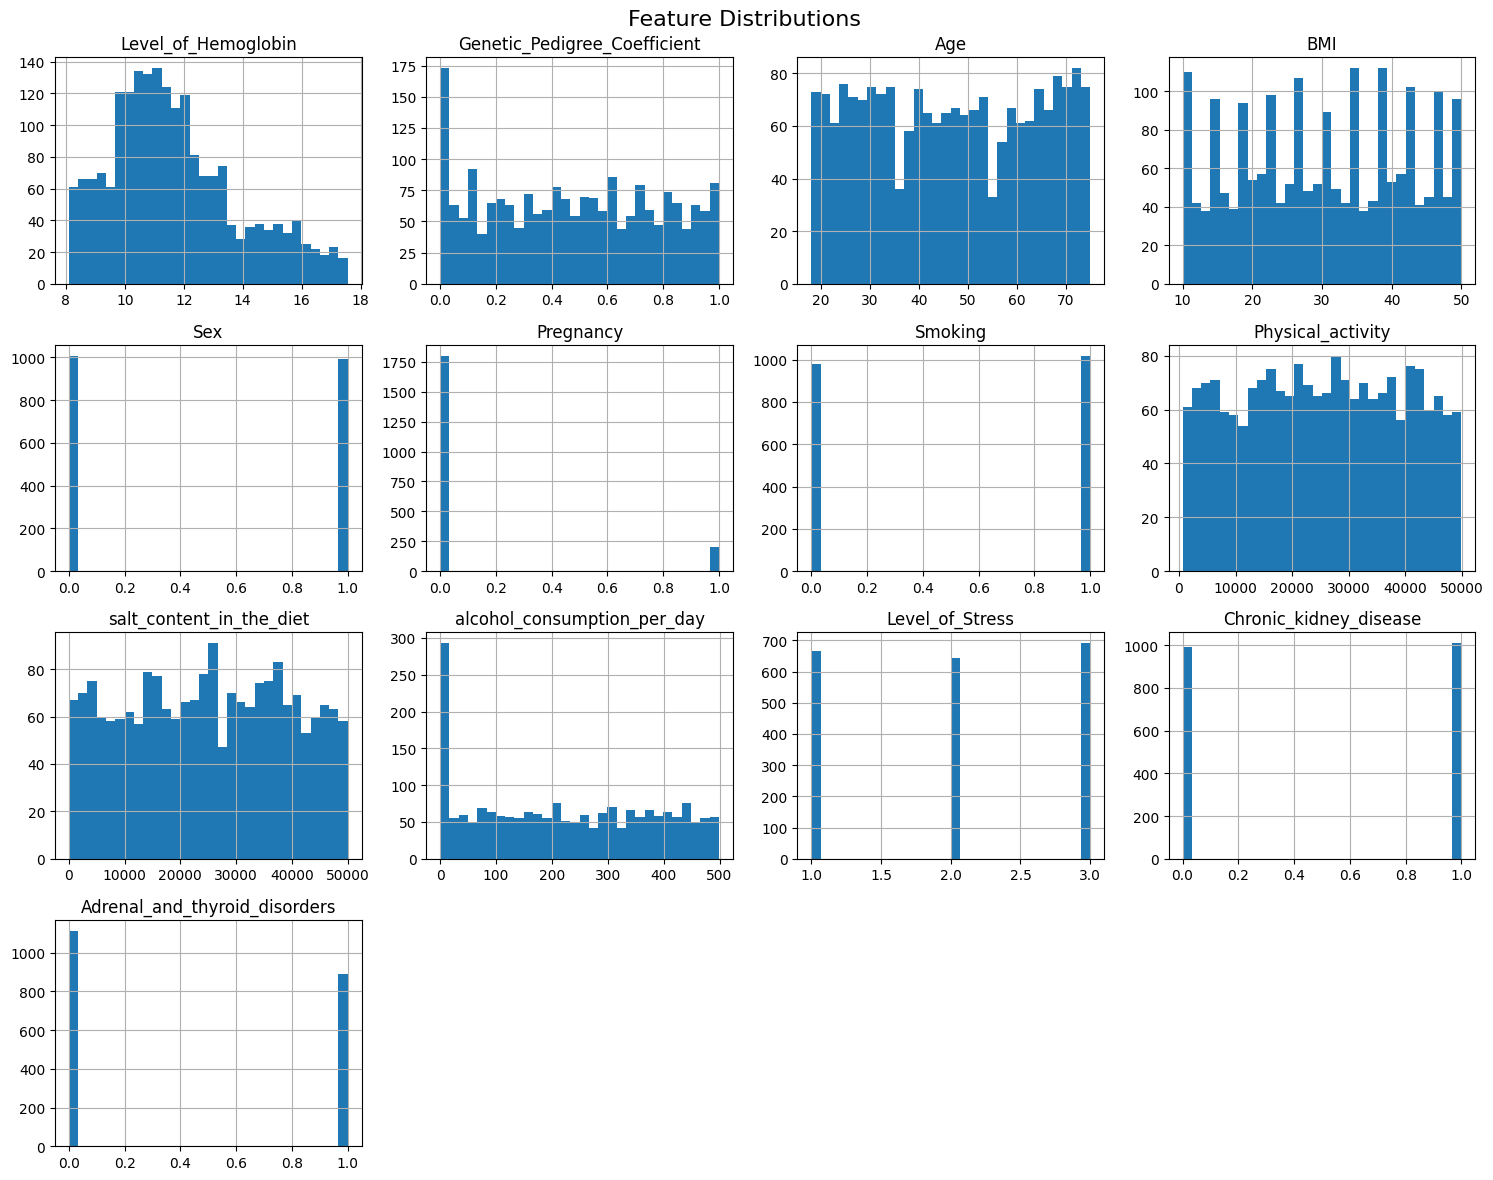

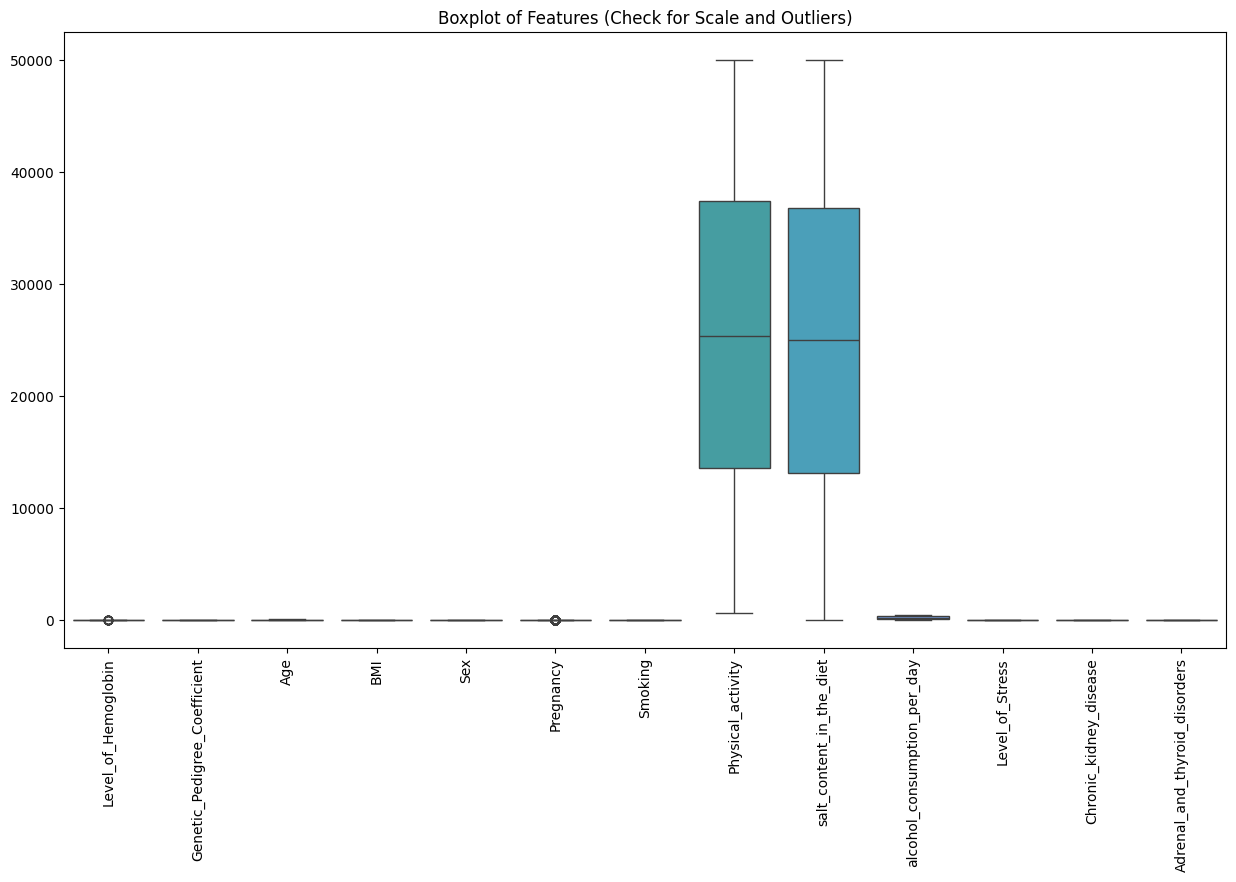

In [7]:
features = df.drop("Blood_Pressure_Abnormality", axis=1)

# Plot histograms
features.hist(bins=30, figsize=(15, 12))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Plot boxplots to check for outliers and scale range
plt.figure(figsize=(15, 8))
sns.boxplot(data=features)
plt.xticks(rotation=90)
plt.title("Boxplot of Features (Check for Scale and Outliers)")
plt.show()


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Blood_Pressure_Abnormality     2000 non-null   int64  
 1   Level_of_Hemoglobin            2000 non-null   float64
 2   Genetic_Pedigree_Coefficient   2000 non-null   float64
 3   Age                            2000 non-null   int64  
 4   BMI                            2000 non-null   int64  
 5   Sex                            2000 non-null   int64  
 6   Pregnancy                      2000 non-null   float64
 7   Smoking                        2000 non-null   int64  
 8   Physical_activity              2000 non-null   int64  
 9   salt_content_in_the_diet       2000 non-null   int64  
 10  alcohol_consumption_per_day    2000 non-null   float64
 11  Level_of_Stress                2000 non-null   int64  
 12  Chronic_kidney_disease         2000 non-null   i

In [7]:
sc1 = StandardScaler()
cols_to_scale = ['Level_of_Hemoglobin','Genetic_Pedigree_Coefficient', 'Age','BMI',
                 'Physical_activity','salt_content_in_the_diet','alcohol_consumption_per_day',
                 'Level_of_Stress']
df[cols_to_scale] = sc1.fit_transform(df[cols_to_scale])

In [8]:
X = df.drop("Blood_Pressure_Abnormality", axis=1)
y = df["Blood_Pressure_Abnormality"].astype(int)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
(df['Blood_Pressure_Abnormality'] == 1).sum()


np.int64(987)

In [11]:
(df['Blood_Pressure_Abnormality'] == 0).sum()

np.int64(1013)

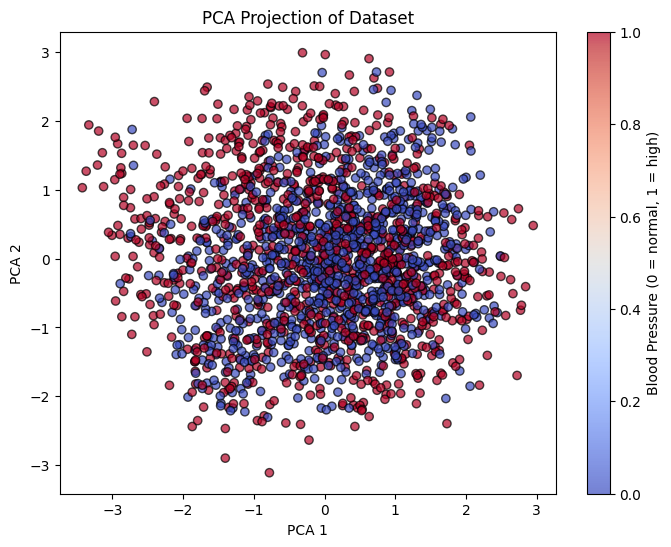

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k', alpha=0.7)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('PCA Projection of Dataset')
plt.colorbar(label='Blood Pressure (0 = normal, 1 = high)')
plt.show()

no clear margin so ensemble methodes should be used for this data set

In [13]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [14]:
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'verbosity': -1,
    'random_state': 42
}

# Train the model
model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, test_data],
    num_boost_round=100
)

# Predict
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)


In [15]:

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.885
Confusion Matrix:
 [[186  17]
 [ 29 168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.92      0.89       203
           1       0.91      0.85      0.88       197

    accuracy                           0.89       400
   macro avg       0.89      0.88      0.88       400
weighted avg       0.89      0.89      0.88       400

